<a href="https://colab.research.google.com/github/Micasaccone/ProyectoDS_ParteIII_-Saccone/blob/main/ProyectoDS_ParteIII_%2BSaccone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Base de datos campaña de ventas - marzo 2024**

*  El **objetivo** es poder analizar la campaña ya efectuada para poder optimizar la publicidad digital de las próximas campañas. Se busca poder lograr una predicción a fin de poder diseñar una campaña que genere mayor cantidad de ventas en un período determinado.
A raíz de analizar las distintas variables debemos encontrar algún patrón que nos permita determinar una estrategia de campaña eficiente donde se aumenten las ventas.
Las variables a analizar son:
- Cantidad de productos vendidos según el género
- Distribución de compra según provincia
- Comparar la cantidad de compras a lo largo del mes según la edad y género.
- Comparar si gastan mayor cantidad de dinero los clientes nuevos o recurrentes (diferenciando según el género)
- Cómo sintió la venta el cliente

La **principal hipotesis** recae en que la mayoría de las compras las realizan mujeres (ya que se trata de productos de cosmetica y maquillaje), dentro de los fines de semana (en general es cuándo mayor tiempo de ocio hay). Con respecto a la edad, no hay una edad mayoritaria ya que son productos varios


Se van a utilizar dos tipos de Modelos Supervisados:
1. Modelo de Regresió Lineal
2. Árbol de Selección

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from datetime import datetime



sns.set()

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
df= pd.read_excel('/content/BASE DE DATOS VENTAS (1).xlsx')
df.head()

,ID de venta,Género,Edad,Producto,Precio Unitario,Cantidad,Precio Total,Canal de Compra,Ciudad,Fecha de Compra,Tipo de Entrega,Modalidad de Pago,Estado de la venta,Validación en Atención,Tipo de cliente
0,2889.0,F,19.0,Crema hidratante facial,47500.0,1.0,47500.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,Poco Satisfactoria,Nuevo
1,2890.0,F,40.0,Lápiz labial,3269.0,5.0,16345.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Transferencia,Buena,Recurrente
2,2891.0,F,44.0,Crema hidratante facial,47500.0,5.0,237500.0,Web Comex,Provincia de Buenos Aires,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Efectivo,Buena,Recurrente
3,2892.0,F,27.0,Lápiz labial,3269.0,1.0,3269.0,Web Comex,Provincia de Buenos Aires,2024-03-08,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Pendiente Entrega,Buena,Nuevo
4,2893.0,F,50.0,Crema hidratante facial,47500.0,1.0,47500.0,Web Comex,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,Buena,Recurrente


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2892 entries, 0 to 2891
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID de venta             2888 non-null   float64       
 1   Género                  2888 non-null   object        
 2   Edad                    2888 non-null   float64       
 3   Producto                2888 non-null   object        
 4   Precio Unitario         2888 non-null   float64       
 5   Cantidad                2888 non-null   float64       
 6   Precio Total            2888 non-null   float64       
 7   Canal de Compra         2888 non-null   object        
 8   Ciudad                  2888 non-null   object        
 9   Fecha de Compra         2888 non-null   datetime64[ns]
 10  Tipo de Entrega         2888 non-null   object        
 11  Modalidad de Pago       2888 non-null   object        
 12  Estado de la venta      2892 non-null   object  

In [69]:
df = df.dropna()
df.head()

,ID de venta,Género,Edad,Producto,Precio Unitario,Cantidad,Precio Total,Canal de Compra,Ciudad,Fecha de Compra,Tipo de Entrega,Modalidad de Pago,Estado de la venta,Validación en Atención,Tipo de cliente
0,2889.0,F,19.0,Crema hidratante facial,47500.0,1.0,47500.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,Poco Satisfactoria,Nuevo
1,2890.0,F,40.0,Lápiz labial,3269.0,5.0,16345.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Transferencia,Buena,Recurrente
2,2891.0,F,44.0,Crema hidratante facial,47500.0,5.0,237500.0,Web Comex,Provincia de Buenos Aires,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Efectivo,Buena,Recurrente
3,2892.0,F,27.0,Lápiz labial,3269.0,1.0,3269.0,Web Comex,Provincia de Buenos Aires,2024-03-08,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Pendiente Entrega,Buena,Nuevo
4,2893.0,F,50.0,Crema hidratante facial,47500.0,1.0,47500.0,Web Comex,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,Buena,Recurrente


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2888 entries, 0 to 2887
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID de venta             2888 non-null   float64       
 1   Género                  2888 non-null   object        
 2   Edad                    2888 non-null   float64       
 3   Producto                2888 non-null   object        
 4   Precio Unitario         2888 non-null   float64       
 5   Cantidad                2888 non-null   float64       
 6   Precio Total            2888 non-null   float64       
 7   Canal de Compra         2888 non-null   object        
 8   Ciudad                  2888 non-null   object        
 9   Fecha de Compra         2888 non-null   datetime64[ns]
 10  Tipo de Entrega         2888 non-null   object        
 11  Modalidad de Pago       2888 non-null   object        
 12  Estado de la venta      2888 non-null   object       

In [71]:
df.describe()

,ID de venta,Edad,Precio Unitario,Cantidad,Precio Total,Fecha de Compra
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888
mean,4332.500000,41.792936,18245.122230,2.995499,54422.501731,2024-03-15 16:53:11.135734272
min,2889.000000,18.000000,2500.000000,1.000000,2500.000000,2024-03-01 00:00:00
25%,3610.750000,29.000000,4560.000000,2.000000,13500.000000,2024-03-08 00:00:00
50%,4332.500000,41.500000,13500.000000,3.000000,30480.000000,2024-03-16 00:00:00
75%,5054.250000,53.000000,20190.000000,4.000000,67500.000000,2024-03-23 00:00:00
max,5776.000000,70.000000,47500.000000,5.000000,237500.000000,2024-03-31 00:00:00
std,833.838114,14.827845,16753.945496,1.415553,61212.194390,NaN


In [72]:
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

       Género                 Producto Canal de Compra Ciudad  \
count    2888                     2888            2888   2888   
unique      2                       10               4      6   
top         F  Crema hidratante facial  Contact Center   CABA   
freq     1556                      488             844    824   

           Tipo de Entrega              Modalidad de Pago Estado de la venta  \
count                 2888                           2888               2888   
unique                   2                              5                  5   
top     Envío a domicilio   Tarjeta de Crédito (3 Cuotas)      Transferencia   
freq                  1717                            691                590   

       Validación en Atención Tipo de cliente  
count                    2888            2888  
unique                      5               2  
top                     Buena           Nuevo  
freq                      768            1444  


**¿Cuál es la cantidad de productos vendidos según el género?**

In [73]:
product_names = ('Crema hidratante facial','Bronceador en polvo','Corrector facial','Lápiz labial','Base de maquillaje líquida','Perfume','Sombra de ojos','Limpiador facial','Máscara de pestañas','Esmalte de uñas')
product_count = df.groupby(['Producto', 'Género']).size().reset_index(name='Count')
fig = px.bar(product_count, x='Producto', y='Count', color='Género', title='¿Cuál es la cantidad de productos vendidos según el género?')
fig.update_xaxes(title='Clase')
fig.update_yaxes(title='Cantidad')
fig.show()

*Podemos observar que se encuentra con una buena distribución la cantidad de productos comprados indiferentemente del sexo de la persona, por ende no es necesario modificar la estructura en nuestra campaña. Podemos sólo para potenciar un nivel mas la campaña redireccipnar al público femenino ya que en porcentaje tienen un poco mas de compras. Podemos identificar que el producto mejor vendido es la "Crema Hidratante", podemos direccionar nuestra publicidad hacia ese producto o armar combos que lo incluyan con nuestros otros productos.
También podemos armar combos con nuestros productos menos vendidos para potenciarlos.*

**2- ¿Cuál es la provincia con mayor cantidad de ventas?**

In [74]:
conteo_Provincia = df['Ciudad'].value_counts()
fig = px.pie(values=conteo_Provincia,
             title="¿Cuál es la provincia con mayor cantidad de ventas?",
             names=conteo_Provincia.index)
fig.update_traces(textinfo='percent+label')

*Podemos observar que el mayor porcentaje de ventas se encuentra entre CABA y Provincia de Buenos Aires, por lo cuál recomendamos segmentar la publicidad en esa zona geográfica. También podemos sumar Córdoba ya que cuenta con un gran porcentaje
En caso de querer potenciar en las provincias restantes, recomendaría analizar costos y beneficios por invertir dinero en publicidad en esas localidades.*

**3- ¿Cuál es la distribución de compras a lo largo del mes, diferenciado por género?**

In [75]:
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])

In [76]:
compras_por_fecha = df.groupby('Fecha de Compra').size()

In [77]:
fig = px.histogram(df, x='Fecha de Compra',y= 'Precio Total', color='Género', title='Histograma de Edades')
fig.update_xaxes(title='Fecha de Compra')
fig.update_yaxes(title='Precio Total')
fig.show()

*Podemos verificar que los picos de compra se dan los fines de semana, por ese motivo, aconsejamos ampliar la pauta en esas fechas. Es bastante parecida la media de compra de ambos géneros, podemos pensar en el armado de combos o campañas para fechas en específico a fin de potenciar la venta de ciertos productos (Día de la madre, Navidad, etc)  .*

**4- ¿Cuál es el promedio de compra según género y tipo de cliente?**

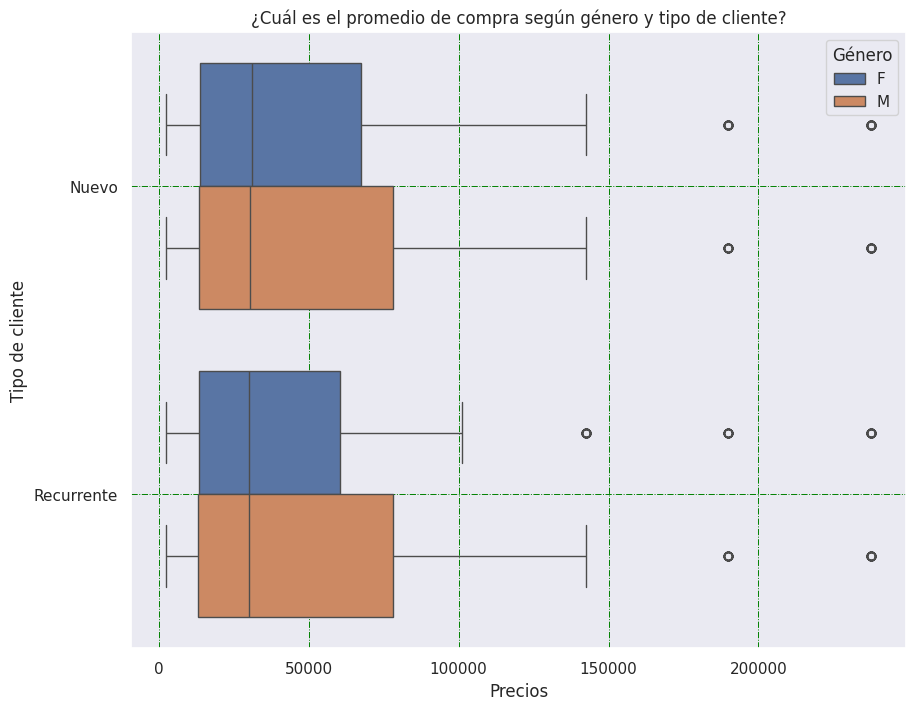

In [78]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Precio Total", y= 'Tipo de cliente', hue= 'Género', data=df)
plt.grid(True)
plt.grid(color='green', linestyle='-.', linewidth=0.7)
plt.title('¿Cuál es el promedio de compra según género y tipo de cliente?')
plt.xlabel('Precios')
plt.show()

*Verificamos que la mayoria de nuestras compras se encuentran dentro de los 10.000 a 60.000. Existen solo dos valores outliers, salvo en el caso de los clientes recurrentes y femeninos que hay uno más. Podríamos potenciar las campañas para que los productos se compren en cantidades asi poder variar la media un poco más arriba.
Podemos tambien indicar que las medias no varian segun el tipo de cliente.
Podemos verificar que la media dentro del género masculino es mas amplia que en el género femenino*

In [79]:
conteo_Provincia = df['Validación en Atención'].value_counts()
fig = px.pie(values=conteo_Provincia,
             title="Persepción de calidad de venta desde el punto de vista del cliente",
             names=conteo_Provincia.index)
fig.update_traces(textinfo='percent+label')

*Podemos indicar que los clientes con una buena persepción se ubican en un 62% y los clientes con una mala persepción se ubican en un 38%. Si bien es mas alto el porcentaje de "Buena Atención", es muy alto el porcentaje de "Mala Atención". Sería interesante agregar la variable de los vendedores para poder generar incentivos a aquellos con mejor calificación.*

In [80]:
Satisfacción = ('Muy Satisfactoria','Satisfactoria','Buena','Poco Satisfactoria', 'Nada Satisfactoria')
product_count = df.groupby(['Validación en Atención', 'Género']).size().reset_index(name='Count')
fig = px.bar(product_count, x='Validación en Atención', y='Count', color='Género', title='Persepción de calidad de venta desde el punto de vista del cliente según el género')
fig.update_xaxes(title='Nivel de Satisfacción')
fig.update_yaxes(title='Cantidad')
fig.show()

*No es una variable que merezca la pena analizar ya que es muy similar la persepción según el género.*

# **MODELO DE REGRESIÓN LINEAL** - *El objetivo es poder determinar si la variable "Cantidad" depende del "Género", para poder realizar una proyección de ventas y segmentación de publicidad. .*

In [81]:
nuevo_df = df[['Género', 'Cantidad']]
print(nuevo_df)


     Género  Cantidad
0         F       1.0
1         F       5.0
2         F       5.0
3         F       1.0
4         F       1.0
...     ...       ...
2883      F       4.0
2884      F       3.0
2885      M       2.0
2886      F       5.0
2887      F       2.0

[2888 rows x 2 columns]


In [82]:
df_encoded = pd.get_dummies(nuevo_df, columns=['Género'])


In [83]:
X = df_encoded.drop(columns=['Cantidad'])
y = nuevo_df['Cantidad']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [85]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [86]:
y_pred=regressor.predict(X_test)

In [87]:
y_test

1157    5.0
1754    2.0
2156    2.0
298     5.0
488     1.0
       ... 
1639    2.0
597     1.0
2238    2.0
1537    2.0
2001    1.0
Name: Cantidad, Length: 578, dtype: float64

In [88]:
regressor.score (X_train, y_train)

-0.00020560865192620348

In [89]:
regressor. score (X_test, y_test)

-0.0015959505397185048

**A priori estos valores indican que el modelo elegido no es válido para el tipo de proyección/análisis a realizar.**

---



**VALIDACIÓN DEL MODELO**

In [90]:
mae = metrics.mean_absolute_error(y_test,y_pred)
print("MAE", mae)

MAE 1.2002155871539792


**Las predicciones del modelo están desviadas en 1.20 unidades de la variable dependiente (en la misma escala que y).**

In [91]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("MSE", mse)

MSE 1.999678202566391


**Indica que las predicciones del modelo tienen un error cuadrático promedio de aproximadamente 1.999 unidades al cuadrado.**

In [92]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 1.414099785222525


**Indica que las predicciones del modelo tienen un error promedio de aproximadamente 1.41 unidades.**



In [93]:
r2 = r2_score(y_test,y_pred)
print(r2)

-0.0015959505397185048


**Indica que el modelo no está explicando bien la variabilidad de los datos y podría estar ajustando peor que simplemente usar la media de los valores observados.**

**Conclusión:** podemos indicar que el modelo aplicado no sirve para el análisis definido en la hipótesis. Tanto los primeros resultados de validación como los algoritmos de medición dan resultados malos y principalmente resultados negativos.

# **MODELO DE ARBOL DE SELECCIÓN** - *Verificar la relación entre el género y edad con la Satisfacción del Cliente al momento de la atención a fin de poder determinar predicciones a futuro*

In [94]:
reemplazo_genero = {'M': 0, 'F': 1}
reemplazo_validacion = {
    'Muy Satisfactoria': 5,
    'Satisfactoria': 4,
    'Buena': 3,
    'Poco Satisfactoria': 2,
    'Nada Satisfactoria': 1
}


In [95]:
df['Género'] = df['Género'].replace(reemplazo_genero)
df['Validación en Atención'] = df['Validación en Atención'].replace(reemplazo_validacion)
df.head()

,ID de venta,Género,Edad,Producto,Precio Unitario,Cantidad,Precio Total,Canal de Compra,Ciudad,Fecha de Compra,Tipo de Entrega,Modalidad de Pago,Estado de la venta,Validación en Atención,Tipo de cliente
0,2889.0,1,19.0,Crema hidratante facial,47500.0,1.0,47500.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,2,Nuevo
1,2890.0,1,40.0,Lápiz labial,3269.0,5.0,16345.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Transferencia,3,Recurrente
2,2891.0,1,44.0,Crema hidratante facial,47500.0,5.0,237500.0,Web Comex,Provincia de Buenos Aires,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Efectivo,3,Recurrente
3,2892.0,1,27.0,Lápiz labial,3269.0,1.0,3269.0,Web Comex,Provincia de Buenos Aires,2024-03-08,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Pendiente Entrega,3,Nuevo
4,2893.0,1,50.0,Crema hidratante facial,47500.0,1.0,47500.0,Web Comex,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,3,Recurrente


In [96]:
df = pd.DataFrame(df)

In [97]:
clf = DecisionTreeClassifier (max_depth=10)
X = df[['Género','Edad']]
y = abs(pd.Series(df['Validación en Atención']) - 1)
clf = clf.fit(X, y)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [99]:
tree_clf = DecisionTreeClassifier(random_state=0)


In [100]:
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=0)

In [101]:
preds = tree_clf.predict(X_test)

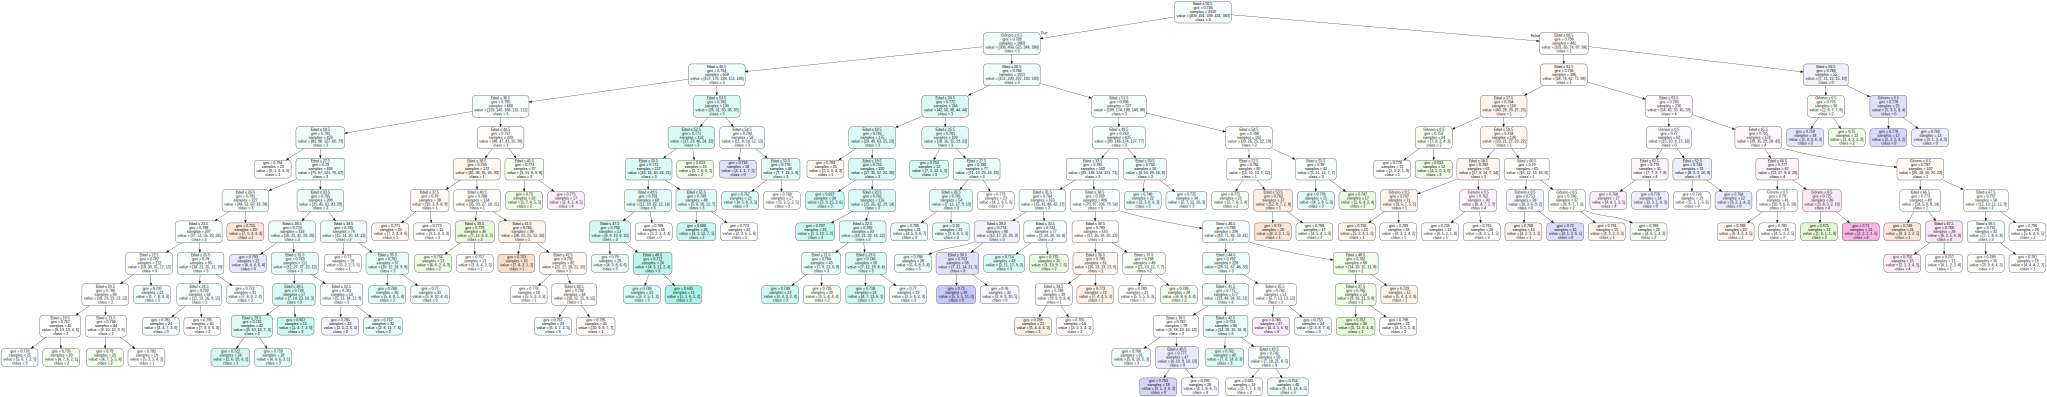

In [102]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None,
                                 feature_names=X.columns,
                                 class_names=y.unique().astype(str),
                                 filled=True, rounded=True,
                                 special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Validación del Modelo**

In [103]:
cf_matrix = metrics.confusion_matrix (y_test, preds)

In [104]:
cf_matrix

array([[16, 24, 34, 14,  6],
       [19, 25, 47, 12,  3],
       [28, 41, 74, 20,  6],
       [18, 20, 57, 14,  7],
       [19, 23, 29, 18,  4]])

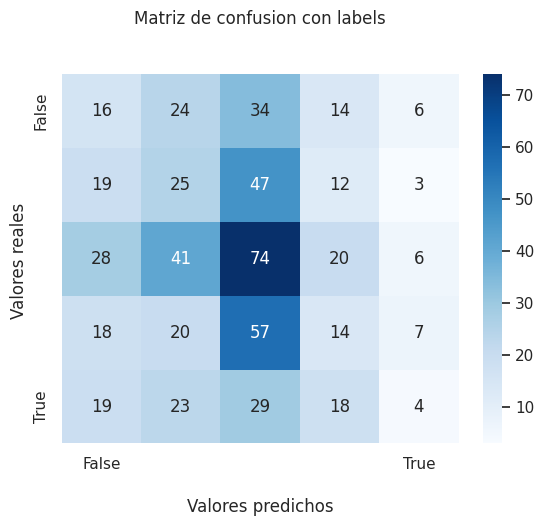

In [105]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
tick_locs = ax.get_xticks()
tick_labels = ['False', 'True']
ax.set_xticks([tick_locs[0], tick_locs[-1]])  # Set ticks to first and last
ax.set_xticklabels(tick_labels)

ax.set_yticks([tick_locs[0], tick_locs[-1]])  # Set ticks to first and last
ax.set_yticklabels(tick_labels)

plt.show()

In [106]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy

0.2301038062283737

**En este caso, el modelo tiene una exactitud del 23.01%, lo cual significa que aproximadamente el 23.01% de las predicciones son correctas.**

In [107]:
precision = metrics.precision_score(y_test, preds, average='macro')
print(precision)

0.19767144001081544


**Es una precisión baja, lo que indica que el modelo tiene dificultades para predecir correctamente las muestras positivas.**

In [108]:
recall_macro = metrics.recall_score(y_test, preds, average='macro')
print(f'Recall (sensibilidad) macro: {recall_macro}')

Recall (sensibilidad) macro: 0.20152641058140267


**Una sensibilidad baja muestra que el modelo no identifica bien las muestras positivas.**

In [109]:
f1 = metrics.f1_score(y_test, preds, average='macro')
print(f1)

0.1893371743896732


**Muestra una medida baja entre la precisión y el recall.**

In [110]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.16      0.17      0.16        94
           1       0.19      0.24      0.21       106
           2       0.31      0.44      0.36       169
           3       0.18      0.12      0.14       116
           4       0.15      0.04      0.07        93

    accuracy                           0.23       578
   macro avg       0.20      0.20      0.19       578
weighted avg       0.21      0.23      0.21       578



**CONCLUSIÓN:** El modelo no está realizando predicciones precisas para las clases individuales ni de manera global. Hay un bajo rendimiento general del modelo.El reporte de clasificación detalla métricas específicas por clase, mostrando que algunas clases tienen un desempeño ligeramente mejor que otras, pero en general todas muestran resultados pobres. Podría ser necesario revisar el enfoque del modelo, la selección de características o la cantidad de datos disponibles para mejorar su desempeño.

**COCLUSIÓN GENERAL:** Tanto los gráficos inciales como los modelos elegidos, nos indican que la hipótesis pricipal elegida no es correcta, ya que no hay una relación directa entre el género y la cantidad de compras por un lado. Es probable que las variables Género y Edad, en el Modelo de Árbol de Clasificación, por sí solas no sean suficientes para explicar la variabilidad en Validación en Atención.
En este caso recomendaría continuar el análisis con otros modelos más sofisticados.